The dataset is composed of a small number of sample and a large number of categorical (binary) features. Given the nature of the feature, topics, I used MCA as dimensionality reduction technique in order to decrease the linear correlation between the features. I used MCA instead of PCA because is a dimensionality reduction technique for categorical features.

I tested different models by stratified Cross Validation and F1-measure as evaluation metrics. The dataset is quite unbalanced and I tried to use different upsampling and downsampling techniques with no luck. 

In [3]:
import pandas as pd 
import os
import numpy as np
import xgboost as xgb
import lightgbm as lgbm
import utils as ut
from collections import defaultdict
import operator 
import plotly as py
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
from scipy.stats import skew, boxcox
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler,SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
sns.set(color_codes=True)
%pylab inline

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy



In [4]:
ROOT = os.path.abspath("./data")
TRAIN_FILE = os.path.join(ROOT, 'training.csv')
TEST_FILE = os.path.join(ROOT, 'testing.csv')

assert os.path.exists(ROOT)
assert os.path.exists(TRAIN_FILE)
assert os.path.exists(TEST_FILE)


In [5]:
train = pd.read_csv(TRAIN_FILE)
test = pd.read_csv(TEST_FILE)

# result model selection with different factors

In [ ]:
results=[{'kind':'naiveBayesB','factors':10,'acc':0.12645,'f1':0.21011156830580946},
            {'kind':'naiveBayesB','factors':100,'acc':0.2547,'f1':0.28727050818930155},
            {'kind':'naiveBayesB','factors':500,'acc':0.31650000000000006,'f1':0.3192703910150568},
            {'kind':'naiveBayesB','factors':1000,'acc':0.32034999999999997,'f1':0.3264149792525196},
            {'kind':'naiveBayesB','factors':2000,'acc':0.3183,'f1':0.3306926417516257},
            {'kind':'naiveBayesB','factors':4000,'acc':0.28905000000000003,'f1':0.30743640822712653},
            {'kind':'naiveBayesB','factors':6000,'acc':0.27435,'f1':0.29537615584856936},
            {'kind':'svm_linear','factors':10,'acc':0.1287,'f1':0.21528337473384895},
            {'kind':'svm_linear','factors':100,'acc':0.2818,'f1':0.3451960184748698},
            {'kind':'svm_linear','factors':500,'acc':0.34865,'f1':0.37341695223211196},
            {'kind':'svm_linear','factors':1000,'acc':0.32935000000000003,'f1':0.34341797168187777},
            {'kind':'LogReg','factors':10,'acc':0.12910000000000002,'f1':0.21526709141729294},
            {'kind':'LogReg','factors':100,'acc':0.27280000000000004,'f1':0.3251063765962684},
            {'kind':'LogReg','factors':500,'acc':0.33315,'f1':0.3663592298454581},
            {'kind':'LogReg','factors':1000,'acc':0.33925000000000005,'f1':0.3703325320115182},
            {'kind':'LogReg','factors':2000,'acc':0.33930000000000005,'f1':0.3692964179333436},
            {'kind':'LogReg','factors':4000,'acc':0.34324999999999994,'f1':0.37298221777409213},
            {'kind':'LogReg','factors':6000,'acc':0.34505,'f1':0.3752694043219494},
            {'kind':'RandomForest','factors':10,'acc':0.08274999999999999,'f1':0.10345457721154747},
            {'kind':'RandomForest','factors':100,'acc':0.1618,'f1':0.18556044114421621},
            {'kind':'RandomForest','factors':500,'acc':0.14499999999999996,'f1':0.16655636009818248},
            {'kind':'RandomForest','factors':1000,'acc':0.12745,'f1':0.1493286825730839},
            {'kind':'RandomForest','factors':2000,'acc':0.11514999999999997,'f1':0.13643402479117075},
            {'kind':'RandomForest','factors':4000,'acc':0.10225,'f1':0.1243647631274544},
            {'kind':'RandomForest','factors':6000,'acc':0.10070000000000001,'f1':0.12243301909735327},
            {'kind':'RidgeClassifier','factors':10,'acc':0.12895,'f1':0.21582361342373063},
            {'kind':'RidgeClassifier','factors':100,'acc':0.26575000000000004,'f1':0.3302802075344601},
            {'kind':'RidgeClassifier','factors':500,'acc':0.34809999999999997,'f1':0.3868145863141509},
            {'kind':'RidgeClassifier','factors':1000,'acc':0.36125,'f1':0.39411710425977686},
            {'kind':'RidgeClassifier','factors':2000,'acc':0.36124999999999996,'f1':0.38952560851102797},
            {'kind':'RidgeClassifier','factors':4000,'acc':0.3463,'f1':0.3719846628348648},
            {'kind':'RidgeClassifier','factors':6000,'acc':0.3396,'f1':0.36479259053206115},
            {'kind':'XGboost','factors':1000,'acc':0.317,'f1':0.33453628348648},
            {'kind':'XGboost','factors':2000,'acc':0.297,'f1':0.312585}]


In [29]:
rdf=pd.DataFrame(results)

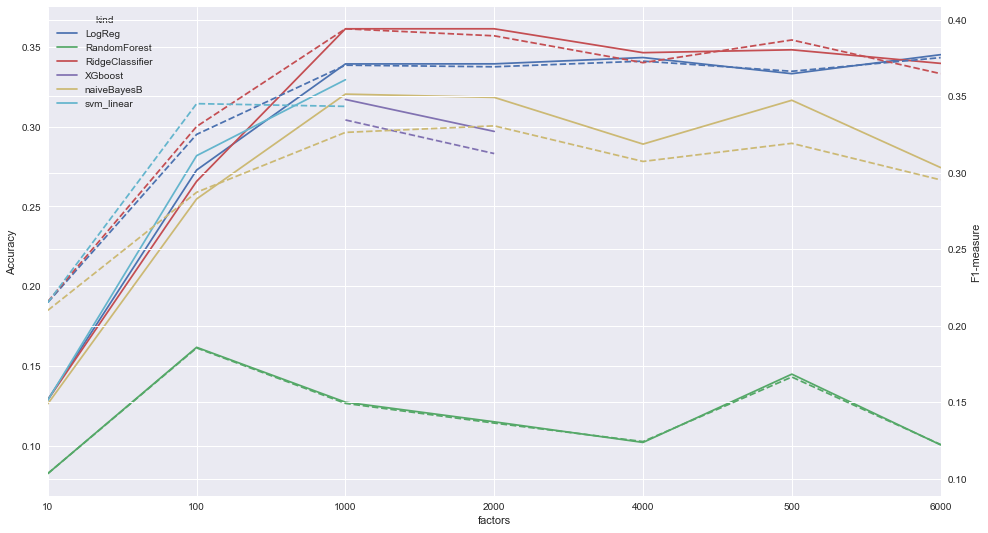

In [68]:
plt.rcParams["figure.figsize"] = [16,9]
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
rdf['factors'] = rdf['factors'].astype(str)
pivoted = pd.pivot_table(rdf, values='acc', columns='kind', index='factors')
pivoted2 = pd.pivot_table(rdf, values='f1', columns='kind', index='factors')
# the ax keyword sets the axis that the data frame plots to
pivoted.plot(ax=ax1, legend=True)

pivoted2.plot(ax=ax2, legend=False,style=['--','--','--','--','--','--'])
ax2
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('F1-measure')
plt.show()


In [5]:
train = pd.read_csv(TRAIN_FILE)
test = pd.read_csv(TEST_FILE)

# Grid search Logistic regression

In [14]:




res = []

param_grid = {'C': [1, 10, 100, 1000], 'n_jobs':[-1],'class_weight': ['balanced',None],'penalty':['l2'], 'solver':['newton-cg']}

filenames=['reduced_10.out','reduced_100.out','reduced_500.out','reduced_1000.out','reduced_2000.out','reduced_4000.out','reduced_6000.out']
for fname in filenames:
    #param_grid = {'C': [1, 10, 100, 1000], 'class_weight': ['balanced',None],'penalty':['l1','l2']}
    pa=ParameterGrid(param_grid)
    print(fname)
    X_train=np.loadtxt(fname, delimiter=',')
    X_train = X_train[:20000,:]
    train.state = pd.Categorical(train.state)
    Y_train= train.state.cat.codes

    clf = RidgeClassifierCV(alphas=[1,0.1,0.01,0.001])
    clf.fit(X_train, Y_train)
    pred=clf.predict(X_train)
#     ac.append(accuracy_score(pred, YT))
#     f1.append(metrics.f1_score(pred, YT, average='weighted'))
    print("accuracy mean {}".format(accuracy_score(pred, Y_train)))
    print("f1 mean {}".format(metrics.f1_score(pred, Y_train, average='weighted')))
    res.append({'file':fname,'model':clf,'acc':accuracy_score(pred, Y_train),'f1':metrics.f1_score(pred, Y_train, average='weighted')})


reduced_10.out
accuracy mean 0.12915
f1 mean 0.2165009019802939
reduced_100.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.



accuracy mean 0.2732
f1 mean 0.33810671446036156
reduced_500.out
accuracy mean 0.3893
f1 mean 0.42577444680371346
reduced_1000.out
accuracy mean 0.4479
f1 mean 0.47403338334016387
reduced_2000.out
accuracy mean 0.54845
f1 mean 0.5612975093071036
reduced_4000.out
accuracy mean 0.71135
f1 mean 0.7127614218186579
reduced_6000.out
accuracy mean 0.76585
f1 mean 0.7654327651616434


In [32]:

filenames=['reduced_10.out','reduced_100.out','reduced_500.out','reduced_1000.out','reduced_2000.out','reduced_4000.out','reduced_6000.out']
for fname in filenames:
    print(fname)
    X_train=np.loadtxt(fname, delimiter=',')
    X_train = X_train[:20000,:]
    train.state = pd.Categorical(train.state)
    Y_train= train.state.cat.codes
    n_folds=50
    kf = StratifiedKFold(n_splits=50)#KFold(n_splits=n_folds,random_state=11)
    ac = []
    f1 = []
    for train_index, valid_index in kf.split(X_train,Y_train):

        X, XT = X_train[train_index], X_train[valid_index]
        Y, YT = Y_train[train_index], Y_train[valid_index]

        clf = RidgeClassifier()
        clf.fit(X, Y)
        pred=clf.predict(XT)
        ac.append(accuracy_score(pred, YT))
        f1.append(metrics.f1_score(pred, YT, average='weighted'))
    print("accuracy mean {}".format(np.average(ac)))
    print("f1 mean {}".format(np.average(f1)))

reduced_10.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:597: Warning:

The least populated class in y has only 33 members, which is too few. The minimum number of members in any class cannot be less than n_splits=50.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.



accuracy mean 0.12882051320418259
f1 mean 0.21599871917654703
reduced_100.out
accuracy mean 0.26637133490315573
f1 mean 0.3333014378018308
reduced_500.out
accuracy mean 0.34896023160163203
f1 mean 0.3928837039945371
reduced_1000.out
accuracy mean 0.364163340950943
f1 mean 0.40201649165379116
reduced_2000.out
accuracy mean 0.36560335157535157
f1 mean 0.39971049402132125
reduced_4000.out
accuracy mean 0.35324412979171455
f1 mean 0.38487901396062035
reduced_6000.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



accuracy mean 0.3469380755157645
f1 mean 0.3778404818450474


## Test oversamplig downsampling

In [45]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle

filenames=['reduced_500.out','reduced_1000.out','reduced_2000.out']
for fname in filenames:
    print(fname)
    X_train=np.loadtxt(fname, delimiter=',')
    X_train = X_train[:20000,:]
    train.state = pd.Categorical(train.state)
    Y_train= train.state.cat.codes
    n_folds=33
    kf = StratifiedKFold(n_splits=n_folds)#KFold(n_splits=n_folds,random_state=11)
    ac = []
    f1 = []
    for train_index, valid_index in kf.split(X_train,Y_train):

        X, XT = X_train[train_index], X_train[valid_index]
        Y, YT = Y_train[train_index], Y_train[valid_index]
        
        undersample_classes={i:1500 for i in Y_train[train_index].value_counts()[Y_train[train_index].value_counts()>1500].index}
        oversample_classes={i:100 for i in Y_train[train_index].value_counts()[Y_train[train_index].value_counts()<100].index}

#         ros = RandomOverSampler(ratio=oversample_classes)
        ros = SMOTE(random_state=42,ratio=oversample_classes)
        X, Y = ros.fit_sample(X, Y)
        
#         print (X.shape)
    
        #rus  = RandomUnderSampler(ratio=undersample_classes)
        #X, Y = rus.fit_sample(X, Y)
        
#         print (X.shape)
        
        ros = RandomOverSampler()
        X, Y = ros.fit_sample(X, Y)
        
        
        X, Y = shuffle(X, Y)
        
#         print (X.shape)
        
        clf = RidgeClassifier()
        clf.fit(X, Y)
        pred=clf.predict(XT)
#         print (accuracy_score(pred, YT))
        ac.append(accuracy_score(pred, YT))
        f1.append(metrics.f1_score(pred, YT, average='weighted'))
    print("accuracy mean {}".format(np.average(ac)))
    print("f1 mean {}".format(np.average(f1)))

reduced_500.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program File

accuracy mean 0.27100077243967485
f1 mean 0.2221468770530078
reduced_1000.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.



accuracy mean 0.2779606141289537
f1 mean 0.22349631313112917
reduced_2000.out


KeyboardInterrupt: 

# best model predict

In [52]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import StratifiedKFold
fname='reduced_1000.out'

print(fname)
data=np.loadtxt(fname, delimiter=',')
X_train = data[:20000,:]
X_test = data[20000:,:]
train.state = pd.Categorical(train.state)
Y_train= train.state.cat.codes

clf = RidgeClassifier()
clf.fit(X_train, Y_train)
pred=clf.predict(X_test)


reduced_1000.out


In [65]:
import csv

start=20001

mapping_states = dict( enumerate(train.state.cat.categories) )
with open('prediction.csv','w',newline="") as outfile:
    writer = csv.writer(outfile)
    for i,p in enumerate(pred):
#         print (i,p)
        writer.writerow([i+start,mapping_states[p]])



# Test LinearDiscriminantAnalysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

filenames=['reduced_10.out','reduced_100.out','reduced_500.out','reduced_1000.out','reduced_2000.out','reduced_4000.out','reduced_6000.out']
for fname in filenames:
    print(fname)
    X_train=np.loadtxt(fname, delimiter=',')
    X_train = X_train[:20000,:]
    train.state = pd.Categorical(train.state)
    Y_train= train.state.cat.codes
    n_folds=10
    kf = KFold(n_splits=n_folds,random_state=11)
    ac = []
    f1 = []
    for train_index, valid_index in kf.split(X_train):

        X, XT = X_train[train_index], X_train[valid_index]
        Y, YT = Y_train[train_index], Y_train[valid_index]

        clf = clf = LinearDiscriminantAnalysis()
        clf.fit(X, Y)
        pred=clf.predict(XT)
        ac.append(accuracy_score(pred, YT))
        f1.append(metrics.f1_score(pred, YT, average='weighted'))
    print("accuracy mean {}".format(np.average(ac)))
    print("f1 mean {}".format(np.average(f1)))

reduced_10.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing



accuracy mean 0.1286
f1 mean 0.21073342149257068
reduced_100.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



accuracy mean 0.2693333333333333
f1 mean 0.28975711916905317
reduced_500.out
accuracy mean 0.33314814814814814
f1 mean 0.32760031085847485
reduced_1000.out
accuracy mean 0.3356652949245542
f1 mean 0.3321751672248108
reduced_2000.out
accuracy mean 0.3231210409971579
f1 mean 0.32572806717929687
reduced_4000.out
accuracy mean 0.2842506350550381
f1 mean 0.29303144977502166
reduced_6000.out


# Test BernoulliNB

In [25]:


filenames=['reduced_10.out','reduced_100.out','reduced_500.out','reduced_1000.out','reduced_2000.out','reduced_4000.out','reduced_6000.out']
for fname in filenames:
    X_train=np.loadtxt(fname, delimiter=',')
    X_train = X_train[:20000,:]
    train.state = pd.Categorical(train.state)
    Y_train= train.state.cat.codes
    n_folds=10
    kf = KFold(n_splits=n_folds,random_state=11)
    ac = []
    f1 = []
    for train_index, valid_index in kf.split(X_train):

        X, XT = X_train[train_index], X_train[valid_index]
        Y, YT = Y_train[train_index], Y_train[valid_index]

        clf = BernoulliNB()
        clf.fit(X, Y)
        pred=clf.predict(XT)
        ac.append(accuracy_score(pred, YT))
        f1.append(metrics.f1_score(pred, YT, average='weighted'))
    print("accuracy mean {}".format(np.average(ac)))
    print("f1 mean {}".format(np.average(f1)))

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.



accuracy mean 0.12645
f1 mean 0.21011156830580946
accuracy mean 0.2547
f1 mean 0.28727050818930155


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



accuracy mean 0.31650000000000006
f1 mean 0.3192703910150568
accuracy mean 0.32034999999999997
f1 mean 0.3264149792525196
accuracy mean 0.3183
f1 mean 0.3306926417516257
accuracy mean 0.28905000000000003
f1 mean 0.30743640822712653
accuracy mean 0.27435
f1 mean 0.29537615584856936


# Test LinearSVC

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

filenames=['reduced_10.out','reduced_100.out','reduced_500.out','reduced_1000.out','reduced_2000.out','reduced_4000.out','reduced_6000.out']
for fname in filenames:
    print(fname)
    X_train=np.loadtxt(fname, delimiter=',')
    X_train = X_train[:20000,:]
    train.state = pd.Categorical(train.state)
    Y_train= train.state.cat.codes
    n_folds=10
    kf = KFold(n_splits=n_folds,random_state=11)
    ac = []
    f1 = []
    for train_index, valid_index in kf.split(X_train):

        X, XT = X_train[train_index], X_train[valid_index]
        Y, YT = Y_train[train_index], Y_train[valid_index]

        clf = svm.LinearSVC()
        clf.fit(X, Y)
        pred=clf.predict(XT)
        ac.append(accuracy_score(pred, YT))
        f1.append(metrics.f1_score(pred, YT, average='weighted'))
    print("accuracy mean {}".format(np.average(ac)))
    print("f1 mean {}".format(np.average(f1)))

reduced_10.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.



accuracy mean 0.1287
f1 mean 0.21528337473384895
reduced_100.out
accuracy mean 0.2818
f1 mean 0.3451960184748698
reduced_500.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no predicted samples.



accuracy mean 0.34865
f1 mean 0.37341695223211196
reduced_1000.out
accuracy mean 0.32935000000000003
f1 mean 0.34341797168187777
reduced_2000.out
accuracy mean 0.30505
f1 mean 0.3152733416444436
reduced_4000.out


KeyboardInterrupt: 

# Test RandomForestClassifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

filenames=['reduced_10.out','reduced_100.out','reduced_500.out','reduced_1000.out','reduced_2000.out','reduced_4000.out','reduced_6000.out']
for fname in filenames:
    print(fname)
    X_train=np.loadtxt(fname, delimiter=',')
    X_train = X_train[:20000,:]
    train.state = pd.Categorical(train.state)
    Y_train= train.state.cat.codes
    n_folds=10
    kf = KFold(n_splits=n_folds,random_state=11)
    ac = []
    f1 = []
    for train_index, valid_index in kf.split(X_train):

        X, XT = X_train[train_index], X_train[valid_index]
        Y, YT = Y_train[train_index], Y_train[valid_index]

        clf = RandomForestClassifier()
        clf.fit(X, Y)
        pred=clf.predict(XT)
        ac.append(accuracy_score(pred, YT))
        f1.append(metrics.f1_score(pred, YT, average='weighted'))
    print("accuracy mean {}".format(np.average(ac)))
    print("f1 mean {}".format(np.average(f1)))

reduced_10.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program File

accuracy mean 0.08274999999999999
f1 mean 0.10345457721154747
reduced_100.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program File

accuracy mean 0.1618
f1 mean 0.18556044114421621
reduced_500.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program File

accuracy mean 0.14499999999999996
f1 mean 0.16655636009818248
reduced_1000.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program File

accuracy mean 0.12745
f1 mean 0.1493286825730839
reduced_2000.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program File

accuracy mean 0.11514999999999997
f1 mean 0.13643402479117075
reduced_4000.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program File

accuracy mean 0.10225
f1 mean 0.1243647631274544
reduced_6000.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.

C:\Program File

accuracy mean 0.10070000000000001
f1 mean 0.12243301909735327


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.



# Test RidgeClassifier

In [77]:
from sklearn.linear_model import RidgeClassifier

filenames=['reduced_10.out','reduced_100.out','reduced_500.out','reduced_1000.out','reduced_2000.out','reduced_4000.out','reduced_6000.out']
for fname in filenames:
    print(fname)
    X_train=np.loadtxt(fname, delimiter=',')
    X_train = X_train[:20000,:]
    train.state = pd.Categorical(train.state)
    Y_train= train.state.cat.codes
    n_folds=10
    kf = KFold(n_splits=n_folds,random_state=11)
    ac = []
    f1 = []
    for train_index, valid_index in kf.split(X_train):

        X, XT = X_train[train_index], X_train[valid_index]
        Y, YT = Y_train[train_index], Y_train[valid_index]

        clf = RidgeClassifier()
        clf.fit(X, Y)
        pred=clf.predict(XT)
        ac.append(accuracy_score(pred, YT))
        f1.append(metrics.f1_score(pred, YT, average='weighted'))
    print("accuracy mean {}".format(np.average(ac)))
    print("f1 mean {}".format(np.average(f1)))

reduced_10.out


C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 in labels with no true samples.



accuracy mean 0.12895
f1 mean 0.21582361342373063
reduced_100.out
accuracy mean 0.26575000000000004
f1 mean 0.3302802075344601
reduced_500.out
accuracy mean 0.34809999999999997
f1 mean 0.3868145863141509
reduced_1000.out
accuracy mean 0.36125
f1 mean 0.39411710425977686
reduced_2000.out
accuracy mean 0.36124999999999996
f1 mean 0.38952560851102797
reduced_4000.out
accuracy mean 0.3463
f1 mean 0.3719846628348648
reduced_6000.out
accuracy mean 0.3396
f1 mean 0.36479259053206115


# Grid search Logistic regression

In [17]:


def xgb_tuner(X,Y, n_models , verbose=False):

    folds = defaultdict(list)
    diz = defaultdict(list)

    
    n_folds = 10
    
    kf = KFold(n_splits=n_folds,random_state=11)

    for i in range(n_models):
        params = {}
        params['booster'] = 'gbtree'
        params['objective'] = 'multi:softprob'
        params['eta'] = 0.3
        params['gamma'] = random.uniform(0, 0.5)
        params['alpha'] = random.uniform(0, 0.5)
        params['lambda'] = random.uniform(0, 1)
        params['min_child_weight'] = random.uniform(0,100)
        params['colsample_bytree'] = random.uniform(0.5,0.99)
        params['subsample'] = random.uniform(0.5,0.99)
        params['max_depth'] = random.randint(6,15)
        params['max_delta_step'] = random.uniform(0,10)
        params['silent'] = 1
        params['random_state'] = 1001
        params['num_class'] = max(Y)+1
        #params['eval_metric'] ="auc"
        
        r_ix = 0
        
        print ("Model number {}".format(i))
        
        predictions = []
        
        split_count=0
        
        dataset = []
        
        for train_index, valid_index in kf.split(X):
            
            
            
            Y_train=Y.values
            X_train, X_valid = X[train_index], X[valid_index]
            y_train, y_valid = Y_train[train_index], Y_train[valid_index]

            run_cv = {}
            
            d_train = xgb.DMatrix(X_train, label=y_train)
            d_valid = xgb.DMatrix(X_valid, label=y_valid)
            
            watchlist = [(d_train, 'train'), (d_valid, 'eval')] 

            model = xgb.train(params, d_train, num_boost_round=1000,  evals = watchlist,
                              early_stopping_rounds=30, verbose_eval = True)


            y_pred_val = model.predict(d_valid)
            error_rate_val = np.sum(y_pred_val != y_valid) / X_valid.shape[0]
            
            y_pred_train = model.predict(d_train)
            error_rate_train = np.sum(y_pred_train != y_train) / X_train.shape[0]
            
            run_cv = {'prob_val':y_pred_val,'prob_train':y_pred_train,'y_val':y_valid,'y_train':y_train}
#             
            dataset.append(run_cv)
            print ("fold number {}".format(split_count))
#             print (y_pred.shape)
#             print (np.argmax(y_pred,axis=1))
            acc=accuracy_score(np.argmax(y_pred_val,axis=1), y_valid)
            print (acc)
#             predictions.append(y_pred)
            r_ix += int(model.best_ntree_limit)
            split_count+=1

        r_ix = int(r_ix/n_folds)
        diz['params'].append(params)
        diz['dataset'].append(dataset)
        diz['acc'].append(acc)
        diz['r_ix'].append(r_ix)
        
        if verbose:        
            print("Model {0}: {1}".format(i,np.mean(diz['acc'])),
                  '\n r_ix = {}'.format(r_ix))
    return diz#,model